# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Import algoritma klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,TransactionDay,TimeSinceLastTransaction,TransactionType_Credit,TransactionType_Debit,...,Channel_Online,CustomerOccupation_Doctor,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,CustomerAgeGroup,TransactionAmountGroup,CustomerAgeGroup_enc,TransactionAmountGroup_enc,Target
0,14.09,70.000000,81.0,1.0,5112.21,16.0,11.0,-13743.648333,0,1,...,0,1,0,0,0,Senior,Medium,2,2,1
1,376.24,68.000000,141.0,1.0,13758.91,16.0,27.0,-11895.421111,0,1,...,0,1,0,0,0,Senior,High,2,0,4
2,126.29,19.000000,56.0,1.0,1122.35,18.0,10.0,-11581.848889,0,1,...,1,0,0,0,1,Youth,High,3,0,2
3,184.50,26.000000,25.0,1.0,8569.06,16.0,5.0,-13167.615278,0,1,...,1,0,0,0,1,Adult,High,0,0,3
4,13.45,44.644916,198.0,1.0,7429.40,17.0,16.0,-9230.254167,1,0,...,1,0,0,0,1,Adult,Medium,0,2,3


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# Pisahkan fitur dan target
X = df.drop(columns=['Target'])
y = df['Target']

# Lakukan pembagian data train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tampilkan bentuk data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train distribusi:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribusi:\n{y_test.value_counts(normalize=True)}")

X_train shape: (2012, 21)
X_test shape: (504, 21)
y_train distribusi:
Target
1    0.312127
3    0.281809
4    0.217694
2    0.188370
Name: proportion, dtype: float64
y_test distribusi:
Target
1    0.311508
3    0.281746
4    0.218254
2    0.188492
Name: proportion, dtype: float64


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [5]:
df.columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionHour', 'TransactionDay',
       'TimeSinceLastTransaction', 'TransactionType_Credit',
       'TransactionType_Debit', 'Channel_ATM', 'Channel_Branch',
       'Channel_Online', 'CustomerOccupation_Doctor',
       'CustomerOccupation_Engineer', 'CustomerOccupation_Retired',
       'CustomerOccupation_Student', 'CustomerAgeGroup',
       'TransactionAmountGroup', 'CustomerAgeGroup_enc',
       'TransactionAmountGroup_enc', 'Target'],
      dtype='object')

In [6]:
# Buatlah model klasifikasi menggunakan Decision Tree

# Drop kolom kategori string hasil binning yang tidak dipakai langsung
df_ready =df.drop(columns=['CustomerAgeGroup', 'TransactionAmountGroup'])

# Fitur X (semua kolom kecuali target)
X = df_ready.drop(columns=['Target'])

# Target y
y = df_ready['Target']

Akurasi: 0.9722
Presisi: 0.9725
Recall: 0.9722
F1-Score: 0.9722

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.98      0.97       157
           2       1.00      1.00      1.00        95
           3       0.97      0.96      0.97       142
           4       0.98      0.95      0.96       110

    accuracy                           0.97       504
   macro avg       0.98      0.97      0.97       504
weighted avg       0.97      0.97      0.97       504



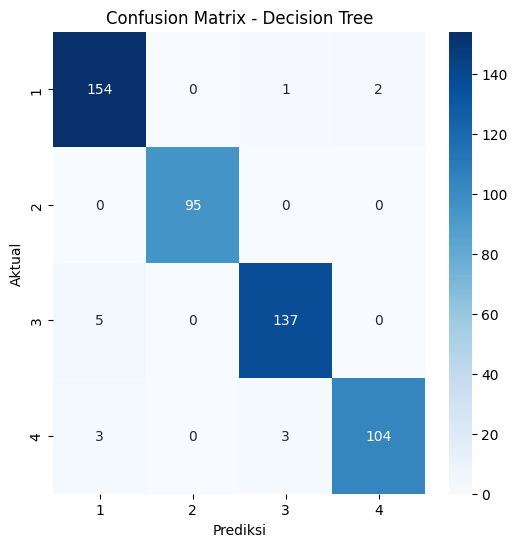

In [7]:
# Split data train-test, stratify supaya distribusi kelas sama
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek kolom kategorikal tersisa yang masih string (object)
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Lakukan Label Encoding pada kolom kategorikal
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Pilih kolom numerik untuk scaling
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Scaling fitur numerik (optional untuk Decision Tree)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Inisialisasi dan latih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = dt_model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [8]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(dt_model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

Random Forest Accuracy: 0.9742
Random Forest Precision: 0.9749
Random Forest Recall: 0.9742
Random Forest F1-Score: 0.9741

Classification Report - Random Forest:
              precision    recall  f1-score   support

           1       0.97      0.99      0.98       157
           2       1.00      1.00      1.00        95
           3       0.95      0.97      0.96       142
           4       1.00      0.93      0.96       110

    accuracy                           0.97       504
   macro avg       0.98      0.97      0.98       504
weighted avg       0.97      0.97      0.97       504



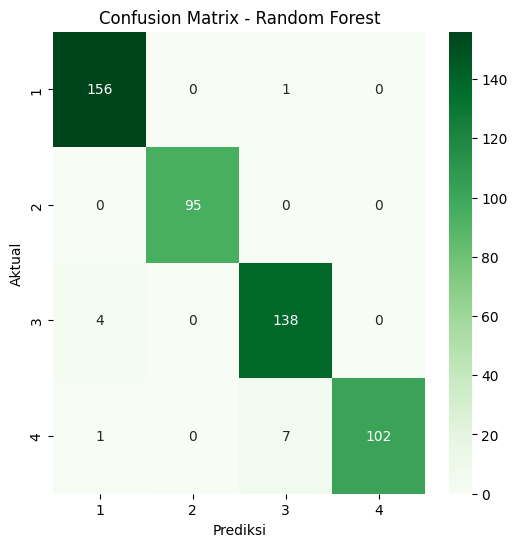

In [9]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Latih model dengan data training
rf_model.fit(X_train, y_train)

# Prediksi data test
y_pred_rf = rf_model.predict(X_test)

# Hitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1-Score: {f1_rf:.4f}")

print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Visualisasi Confusion Matrix
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [10]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')
joblib.dump(rf_model, 'explore_random_forest_classification.h5')

['explore_random_forest_classification.h5']

## Interpretasi Hasil Klasifikasi

### Metode yang digunakan  
- **Decision Tree Classifier**  
- **Random Forest Classifier**  

Kedua metode ini termasuk dalam kategori supervised learning yang populer untuk klasifikasi. Decision Tree memudahkan interpretasi aturan keputusan, sedangkan Random Forest menggabungkan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting.

### Alasan penggunaan  
- **Decision Tree** dipilih karena mudah diinterpretasikan dan cukup efektif pada dataset dengan fitur campuran.  
- **Random Forest** dipilih sebagai ensemble method yang cenderung memberikan performa lebih stabil dan akurasi lebih tinggi, karena mengurangi risiko overfitting dibandingkan pohon tunggal.

### Hasil yang didapat  
- **Decision Tree** mencapai akurasi sekitar 97.22%, dengan nilai presisi, recall, dan F1-score yang konsisten menunjukkan performa yang sangat baik di semua kelas target.  
- **Random Forest** sedikit lebih unggul dengan akurasi 97.42%, presisi 97.49%, recall 97.42%, dan F1-score 97.41%, menandakan model ini lebih stabil dan baik pada dataset ini.

### Perbandingan Performa  
- Meskipun kedua model menunjukkan performa yang sangat baik, Random Forest sedikit lebih unggul pada metrik evaluasi, terutama dalam hal presisi dan recall.  
- Random Forest juga menunjukkan kemampuan lebih baik pada kelas target yang mungkin lebih sulit diklasifikasi, seperti kelas 4, dengan recall lebih tinggi.  
- Model Decision Tree lebih mudah diinterpretasikan, sedangkan Random Forest cenderung memberikan hasil lebih akurat dan tahan noise.


Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

# Definisikan parameter grid untuk tuning Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV untuk Decision Tree
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Jalankan hyperparameter tuning dengan data training (X_train, y_train sudah ada)
grid_search.fit(X_train, y_train)

# Ambil model terbaik hasil tuning
best_model_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.9732


Accuracy: 0.9742
Precision: 0.9744
Recall: 0.9742
F1-Score: 0.9742

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       157
           2       1.00      1.00      1.00        95
           3       0.97      0.96      0.97       142
           4       0.98      0.95      0.97       110

    accuracy                           0.97       504
   macro avg       0.98      0.98      0.98       504
weighted avg       0.97      0.97      0.97       504



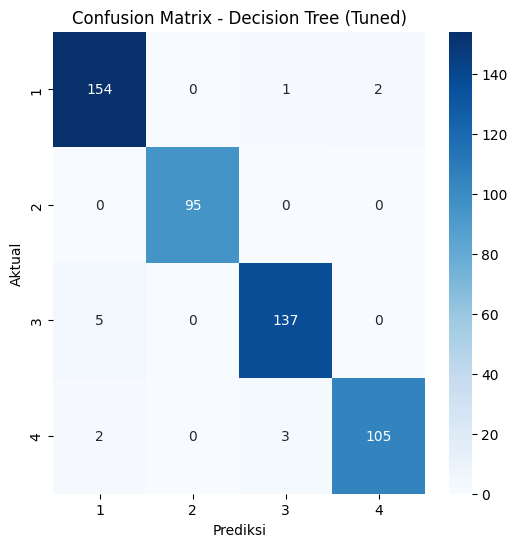

In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

# Evaluasi model terbaik dengan data testing
y_pred = best_model_dt.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualisasi confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model_dt.classes_, yticklabels=best_model_dt.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.show()


Interpretasi Hasil Hyperparameter Tuning Decision Tree
Accuracy 0.9742 artinya model berhasil mengklasifikasikan dengan benar sekitar 97.4% data uji.

Precision, Recall, dan F1-Score semuanya di atas 0.97, ini tanda bahwa model sangat baik dalam memprediksi kelas dengan akurat dan konsisten.

Classification Report menunjukkan bahwa untuk masing-masing kelas (1 sampai 4), nilai precision, recall, dan f1-score sangat tinggi, yang berarti model tidak bias ke salah satu kelas dan mampu mengenali setiap kelas dengan baik.

Hasil tuning memperbaiki performa model dibanding model dasar karena hyperparameter disesuaikan untuk optimasi.


In [13]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')
joblib.dump(best_model_dt, 'tuning_classification.h5')

['tuning_classification.h5']